In [1]:
!python tools/train.py data/rtmpose-s-ear.py

06/04 16:09:10 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 21
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: None
    MSVC: 用于 x64 的 Microsoft (R) C/C++ 优化编译器 19.30.30706 版
    GCC: n/a
    PyTorch: 2.0.1+cu117
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 193431937
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;

c:\users\hkz\mmpose\mmpose\datasets\transforms\common_transforms.py:648: UserWarning: CoarseDropout is not pixel-level transformations. Please use with caution.
  warnings.warn(


06/04 16:38:49 - mmengine - INFO - Epoch(train)  [35][ 1/11]  lr: 3.000000e-03  eta: 3:35:34  time: 4.452481  data_time: 4.291291  memory: 949  loss: 0.080422  loss_kpt: 0.080422  acc_pose: 0.910714
06/04 16:38:54 - mmengine - INFO - Epoch(train)  [35][ 2/11]  lr: 3.000000e-03  eta: 3:35:34  time: 4.462714  data_time: 4.301105  memory: 949  loss: 0.080141  loss_kpt: 0.080141  acc_pose: 0.958333
06/04 16:38:59 - mmengine - INFO - Epoch(train)  [35][ 3/11]  lr: 3.000000e-03  eta: 3:35:37  time: 4.474283  data_time: 4.308664  memory: 949  loss: 0.080096  loss_kpt: 0.080096  acc_pose: 0.937500
06/04 16:39:04 - mmengine - INFO - Epoch(train)  [35][ 4/11]  lr: 3.000000e-03  eta: 3:35:35  time: 4.463931  data_time: 4.295779  memory: 949  loss: 0.079901  loss_kpt: 0.079901  acc_pose: 0.919643
06/04 16:39:07 - mmengine - INFO - Epoch(train)  [35][ 5/11]  lr: 3.000000e-03  eta: 3:35:22  time: 4.434070  data_time: 4.269888  memory: 949  loss: 0.079956  loss_kpt: 0.079956  acc_pose: 0.883929
06/04

##### 在mmpose文件夹下建立该jupyter源文件运行程序
##### 训练数据集在mmpose/data/Ear210_Keypoint_Dataset_coco中
##### 自制的预测图片在mmpose/data/test_ear中
##### config配置文件下载到mmpose/data中

### 测试集上评估模型精度

In [3]:
!python tools/test.py data/rtmpose-s-ear.py \
                      work_dirs/rtmpose-s-ear/epoch_300.pth

06/04 19:17:33 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 21
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: None
    MSVC: 用于 x64 的 Microsoft (R) C/C++ 优化编译器 19.30.30706 版
    GCC: n/a
    PyTorch: 2.0.1+cu117
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 193431937
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;

### 可视化训练日志

In [4]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [5]:
# 日志文件路径
log_path = 'work_dirs/rtmpose-s-ear/20230604_160855/vis_data/scalars.json'

In [6]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [7]:
len(json_list)

3330

In [8]:
eval(json_list[4])

{'lr': 0.0006316026315789474,
 'data_time': 5.712321043014526,
 'loss': 0.2343466579914093,
 'loss_kpt': 0.2343466579914093,
 'acc_pose': 0.05357142857142857,
 'time': 6.5458920955657955,
 'epoch': 1,
 'memory': 949,
 'step': 5}

In [9]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/AP' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 3330/3330 [00:02<00:00, 1125.73it/s]


In [10]:
df_train

,acc_pose,data_time,epoch,loss,loss_kpt,lr,memory,step,time
0,0.015079,13.894835,1.0,0.235037,0.235037,3.000000e-08,904.0,1.0,17.314688
1,0.000000,7.186777,1.0,0.235321,0.235321,1.579232e-04,949.0,2.0,8.931112
2,0.008929,6.408194,1.0,0.235422,0.235422,3.158163e-04,949.0,3.0,7.655524
3,0.011905,5.963549,1.0,0.235220,0.235220,4.737095e-04,949.0,4.0,6.955896
4,0.053571,5.712321,1.0,0.234347,0.234347,6.316026e-04,949.0,5.0,6.545892
...,...,...,...,...,...,...,...,...,...
3295,0.994048,2.514791,300.0,0.023782,0.023782,1.500646e-04,949.0,3296.0,2.770087
3296,1.000000,2.518681,300.0,0.023929,0.023929,1.500413e-04,949.0,3297.0,2.774357
3297,1.000000,2.515062,300.0,0.023950,0.023950,1.500232e-04,949.0,3298.0,2.770458
3298,1.000000,2.511651,300.0,0.023990,0.023990,1.500103e-04,949.0,3299.0,2.766430


In [11]:
df_test

,AUC,NME,PCK,coco/AP,coco/AP (L),coco/AP (M),coco/AP .5,coco/AP .75,coco/AR,coco/AR (L),coco/AR (M),coco/AR .5,coco/AR .75,data_time,step,time
0,0.013719,0.119198,0.458050,0.030798,0.030798,-1.0,0.206179,0.001856,0.069048,0.069048,-1.0,0.309524,0.023810,3.297360,10.0,3.352034
1,0.018934,0.099408,0.676871,0.184198,0.184198,-1.0,0.690646,0.016573,0.235714,0.235714,-1.0,0.761905,0.047619,1.300233,20.0,1.360784
2,0.044671,0.062111,0.891156,0.505452,0.505452,-1.0,1.000000,0.403903,0.547619,0.547619,-1.0,1.000000,0.571429,1.480898,30.0,1.536177
3,0.061054,0.057731,0.908163,0.529532,0.529532,-1.0,1.000000,0.372923,0.590476,0.590476,-1.0,1.000000,0.571429,1.652153,40.0,1.704299
4,0.062358,0.061868,0.876417,0.501479,0.501479,-1.0,1.000000,0.478787,0.545238,0.545238,-1.0,1.000000,0.595238,1.510521,50.0,1.562666
5,0.056973,0.065049,0.850340,0.471124,0.471124,-1.0,0.968647,0.367674,0.509524,0.509524,-1.0,0.976190,0.476190,1.475768,60.0,1.528198
6,0.084297,0.050819,0.944444,0.641759,0.641759,-1.0,1.000000,0.832609,0.678571,0.678571,-1.0,1.000000,0.857143,1.523792,70.0,1.560113
7,0.073186,0.051141,0.951247,0.648957,0.648957,-1.0,1.000000,0.837263,0.683333,0.683333,-1.0,1.000000,0.880952,1.092649,80.0,1.117012
8,0.060658,0.057887,0.907029,0.546554,0.546554,-1.0,1.000000,0.553014,0.590476,0.590476,-1.0,1.000000,0.642857,0.886633,90.0,0.959291
9,0.087585,0.050795,0.945578,0.633347,0.633347,-1.0,1.000000,0.810117,0.671429,0.671429,-1.0,1.000000,0.833333,0.816262,100.0,0.916406


In [12]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

#### 可视化辅助函数

In [13]:
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体

In [14]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

#### 训练集损失函数

In [15]:
df_train.columns

Index(['acc_pose', 'data_time', 'epoch', 'loss', 'loss_kpt', 'lr', 'memory',
       'step', 'time'],
      dtype='object')

In [16]:
metrics = ['loss', 'loss_kpt']

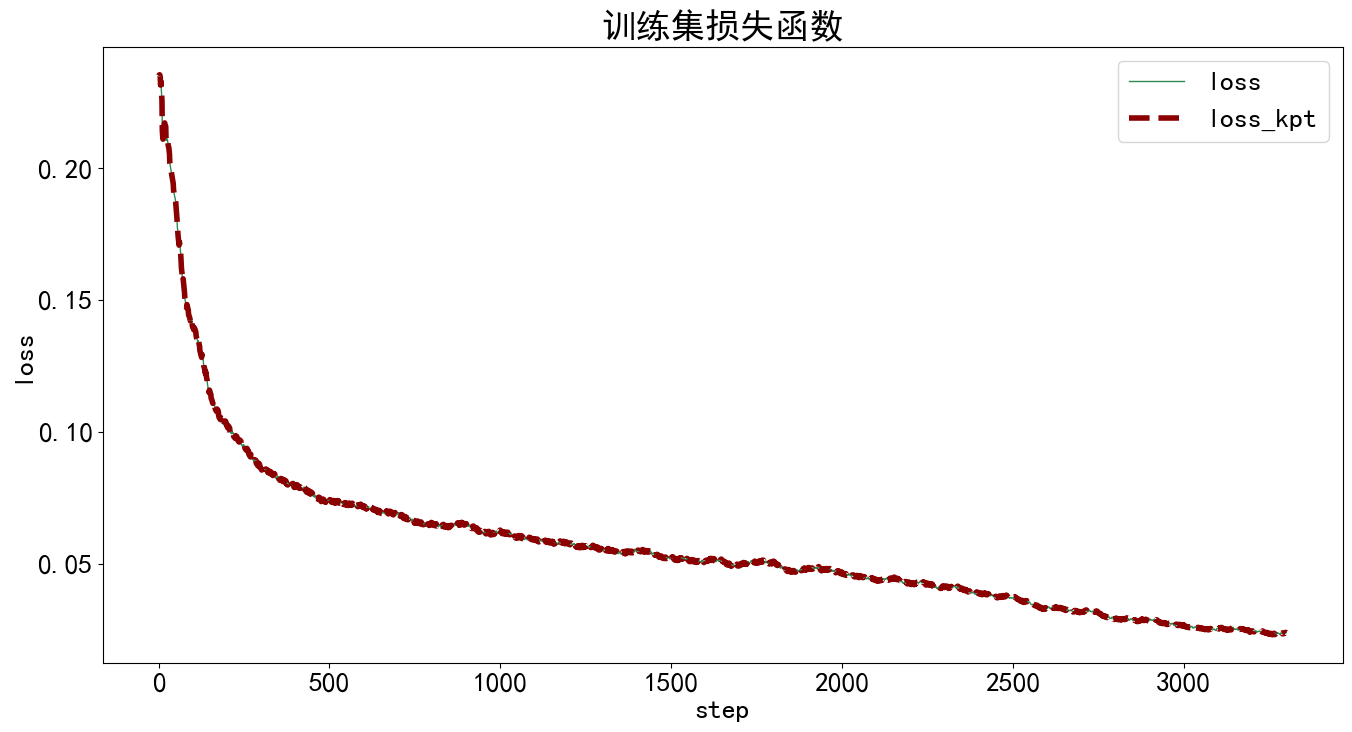

In [17]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

#### 训练集准确率

In [18]:
metrics = ['acc_pose']

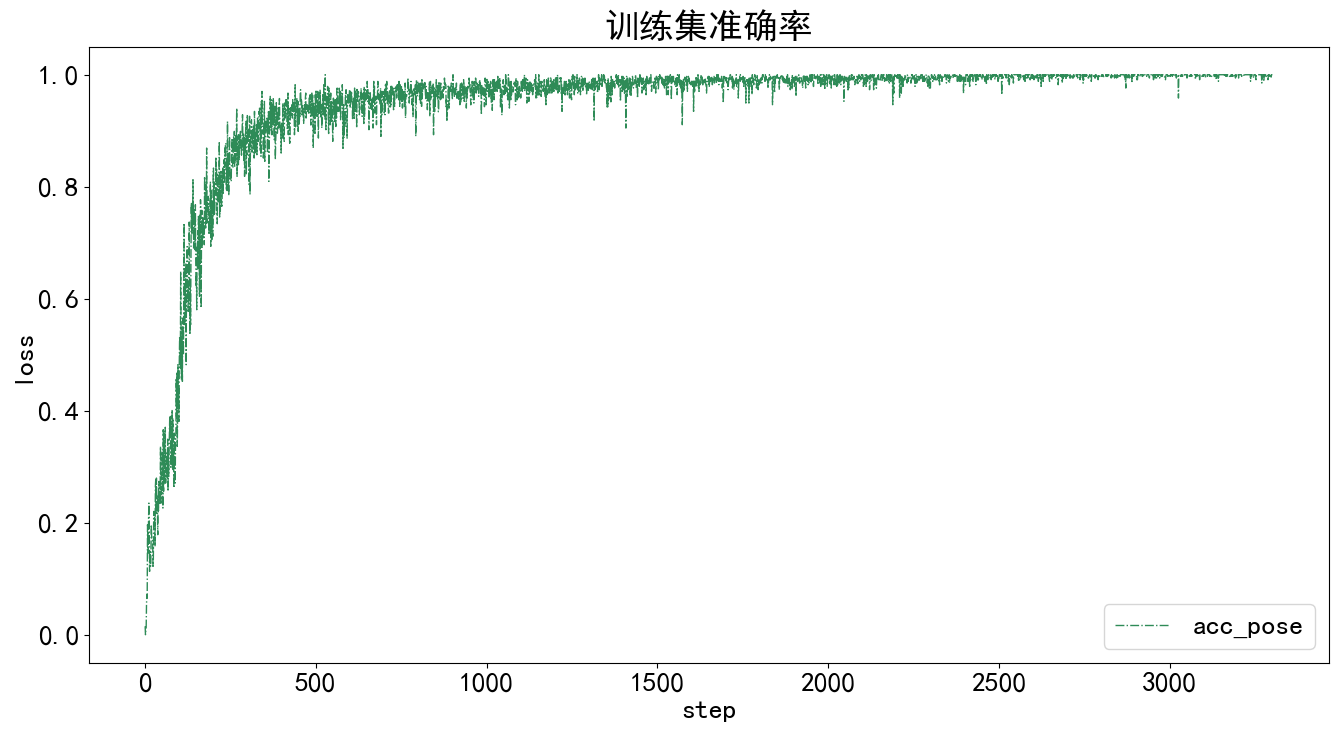

In [19]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

#### 测试集评估指标-MS COCO Metric

In [20]:
df_test.columns

Index(['AUC', 'NME', 'PCK', 'coco/AP', 'coco/AP (L)', 'coco/AP (M)',
       'coco/AP .5', 'coco/AP .75', 'coco/AR', 'coco/AR (L)', 'coco/AR (M)',
       'coco/AR .5', 'coco/AR .75', 'data_time', 'step', 'time'],
      dtype='object')

In [21]:
metrics = ['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)', 'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)', 'PCK', 'AUC']

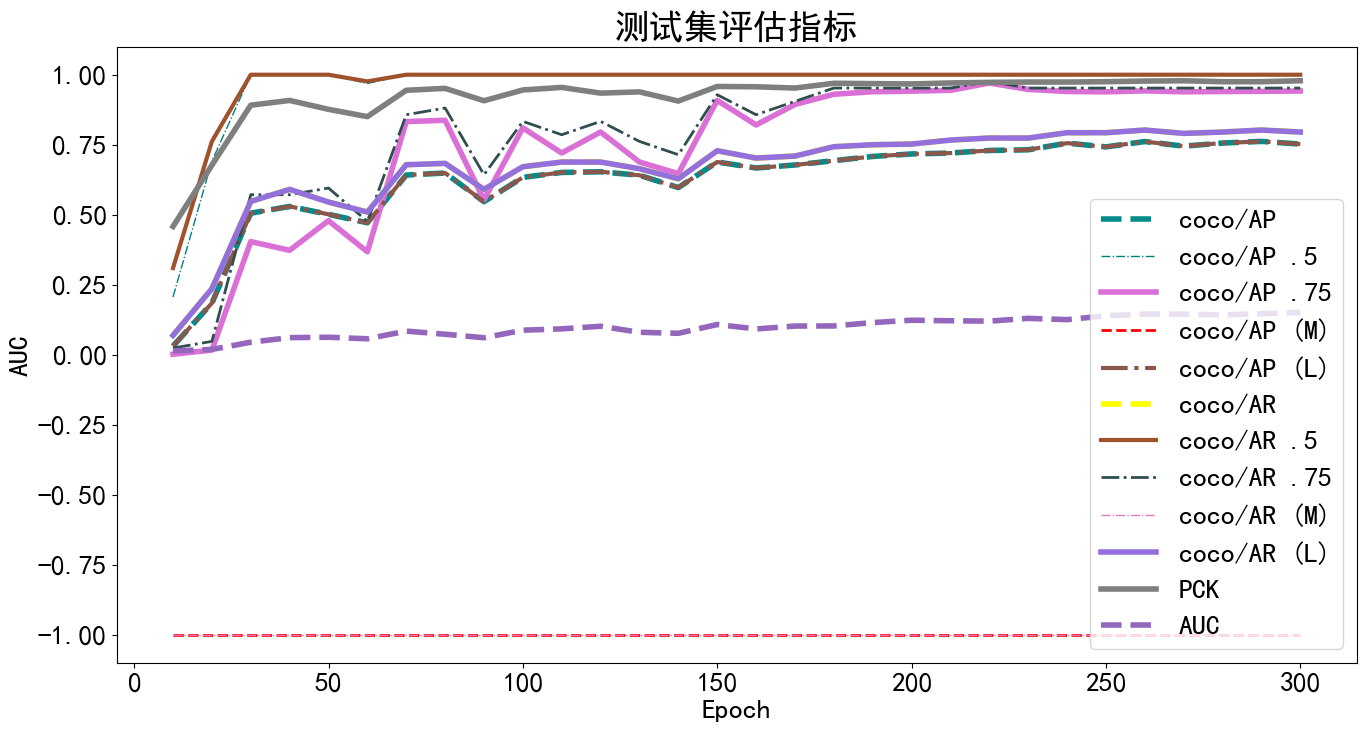

In [22]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

#### 测试集评估指标-NME

In [23]:
metrics = ['NME']

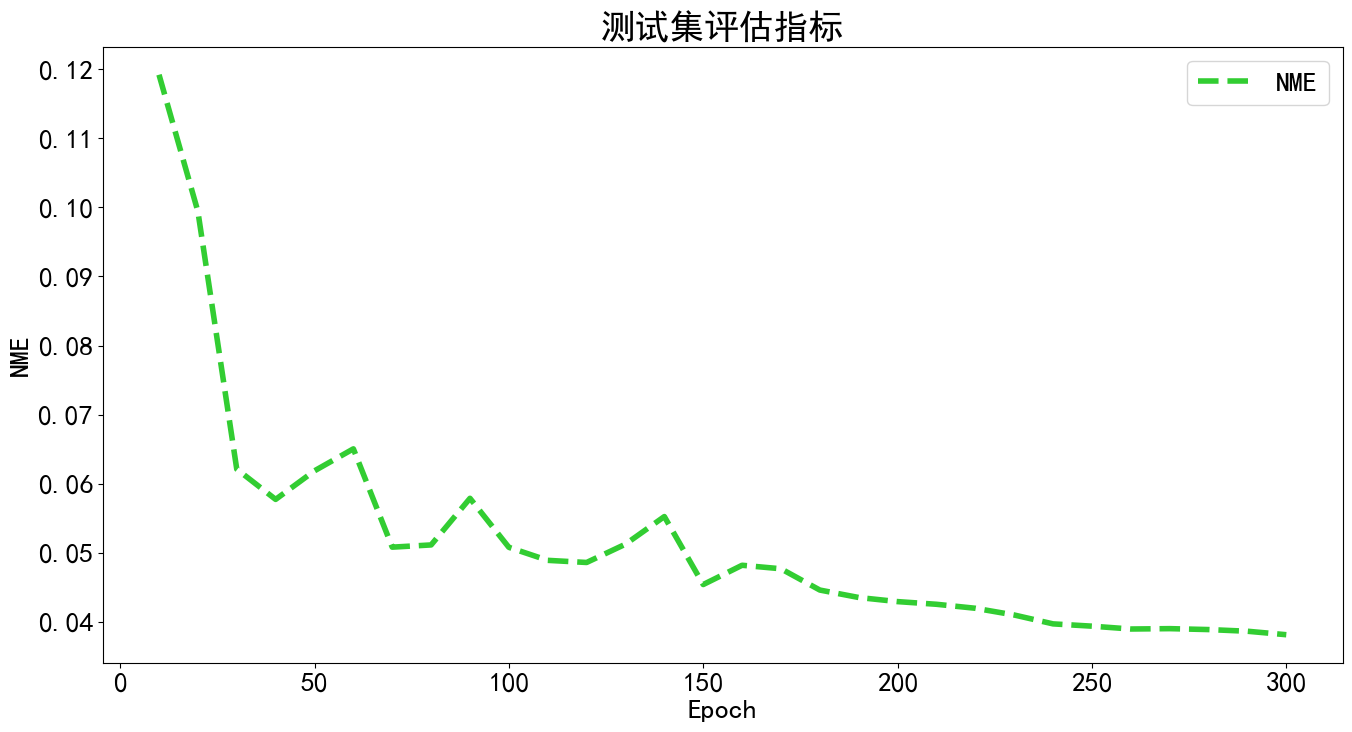

In [24]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

### 模型精简转换

In [25]:
!python tools/misc/publish_model.py \
        work_dirs/rtmpose-s-ear/epoch_300.pth \
        checkpoint/rtmpose-s-triangle-300.pth

06/04 19:22:55 - mmengine - INFO - Key `message_hub` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/04 19:22:55 - mmengine - INFO - Key `optimizer` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/04 19:22:55 - mmengine - INFO - Key `param_schedulers` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/04 19:22:55 - mmengine - INFO - Key `ema_state_dict` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.


### 预测

#### 单张图像-关键点检测预测

In [26]:
# RTMDet --> RTMPose
!python demo/topdown_demo_with_mmdet.py \
        data/rtmdet_tiny_ear.py \
        checkpoint/rtmdet_tiny_ear_epoch_200_20230604-c9577ee7.pth \
        data/rtmpose-s-ear.py \
        checkpoint/rtmpose-s-triangle-300-0624610b_20230604.pth \
        --input data/test_ear/ear3.jpg \
        --output-root outputs/G2_RTMDet-RTMPose \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 36 \
        --thickness 30 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx

Loads checkpoint by local backend from path: checkpoint/rtmdet_tiny_ear_epoch_200_20230604-c9577ee7.pth
Loads checkpoint by local backend from path: checkpoint/rtmpose-s-triangle-300-0624610b_20230604.pth
06/04 19:27:06 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


c:\users\hkz\mmpose\mmpose\models\heads\coord_cls_heads\rtmcc_head.py:217: UserWarning: The predicted simcc values are normalized for visualization. This may cause discrepancy between the keypoint scores and the 1D heatmaps.
  warnings.warn('The predicted simcc values are normalized for '


#### 视频-关键点检测预测

In [28]:
# RTMDet --> RTMPose
!python demo/topdown_demo_with_mmdet.py \
        data/rtmdet_tiny_ear.py \
        checkpoint/rtmdet_tiny_ear_epoch_200_20230604-c9577ee7.pth \
        data/rtmpose-s-ear.py \
        checkpoint/rtmpose-s-triangle-300-0624610b_20230604.pth \
        --input data/test_ear/ear.mp4 \
        --output-root outputs/G2_Video \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 16 \
        --thickness 10 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx

Loads checkpoint by local backend from path: checkpoint/rtmdet_tiny_ear_epoch_200_20230604-c9577ee7.pth
Loads checkpoint by local backend from path: checkpoint/rtmpose-s-triangle-300-0624610b_20230604.pth
06/04 19:35:31 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


c:\users\hkz\mmpose\mmpose\models\heads\coord_cls_heads\rtmcc_head.py:217: UserWarning: The predicted simcc values are normalized for visualization. This may cause discrepancy between the keypoint scores and the 1D heatmaps.
  warnings.warn('The predicted simcc values are normalized for '
